Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
* Thank you for submitting your project! I am really impressed with it. 
* Glad to see that the notebook is structured. Keep it up!
* It was a pleasure to review your project.
* Great that hypothesis testing was done in the right way. You've mastered it!
* Nice going! Good luck with further learning!

In [1]:
import pandas as pd
import datetime
import scipy
from scipy import stats as st
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import levene
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
#%pip install pingouin
import pingouin as pg
from sklearn.linear_model import LogisticRegression

<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for collecting all imports in the first cell!
</div>

# Goal:
Detect ride-sharing behavior to help a new Chicago company, Zuber, devise a market entry strategy.

# Import the files

In [2]:
try:
    trips = pd.read_csv('project_sql_result_01.csv')
    neighborhoods = pd.read_csv('project_sql_result_04.csv')
    ohara = pd.read_csv('project_sql_result_07.csv')
except:
    trips = pd.read_csv('/datasets/project_sql_result_01.csv')    
    neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
    ohara = pd.read_csv('/datasets/project_sql_result_07.csv')

# Study the data 

## Trips

In [3]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
trips.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


#### Conclusion:
Correct data type

### Visualize the data

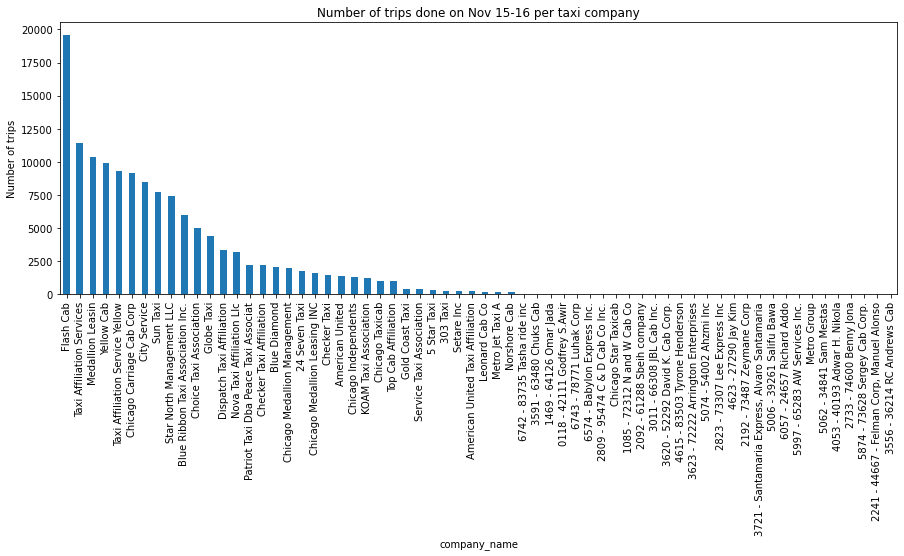

In [5]:
plt.figure(figsize=(15,5))
trips.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of trips done on Nov 15-16 per taxi company')
plt.ylabel('Number of trips');

### Detect the important players

In [6]:
x = (trips.groupby('company_name')['trips_amount'].sum().sort_values(ascending = False))/trips.trips_amount.sum()*100
x.head(20)

company_name
Flash Cab                               14.243578
Taxi Affiliation Services                8.318343
Medallion Leasin                         7.550014
Yellow Cab                               7.201171
Taxi Affiliation Service Yellow          6.772218
Chicago Carriage Cab Corp                6.686282
City Service                             6.152457
Sun Taxi                                 5.608436
Star North Management LLC                5.429281
Blue Ribbon Taxi Association Inc.        4.335414
Choice Taxi Association                  3.652293
Globe Taxi                               3.192024
Dispatch Taxi Affiliation                2.443359
Nova Taxi Affiliation Llc                2.312269
Patriot Taxi Dba Peace Taxi Associat     1.627692
Checker Taxi Affiliation                 1.613855
Blue Diamond                             1.507527
Chicago Medallion Management             1.423775
24 Seven Taxi                            1.292686
Chicago Medallion Leasing INC        

In [7]:
top_10_companies = trips.nlargest(10, 'trips_amount')
top_10_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [8]:
sum(top_10_companies.trips_amount)/sum(trips.trips_amount)

0.7229719396115387

<div class="alert alert-block alert-success">
<b>Success:</b> Great that nlargest method was used here!
</div>

### Conclusion:
The top 10 companies account for over 70\% of trips conducted on Novemebr 15-16 in the dataset.  Flash Cab account for around 15\% of the trips in the total dataset.

### Top 10

In [9]:
top_10_companies['%'] = top_10_companies['trips_amount']/(top_10_companies['trips_amount']).sum()
top_10_companies = top_10_companies.sort_values(by='trips_amount', ascending=False).reset_index(drop=True)
top_10_companies

,company_name,trips_amount,%
0,Flash Cab,19558,0.197014
1,Taxi Affiliation Services,11422,0.115058
2,Medallion Leasin,10367,0.104430
3,Yellow Cab,9888,0.099605
4,Taxi Affiliation Service Yellow,9299,0.093672
5,Chicago Carriage Cab Corp,9181,0.092483
6,City Service,8448,0.085100
7,Sun Taxi,7701,0.077575
8,Star North Management LLC,7455,0.075097
9,Blue Ribbon Taxi Association Inc.,5953,0.059967


### Conclusion:
In this new dataframe, the distribution of number of trips is different with Flash Cab now accounting for 20\% of trips conducted on Noveber 15-16.

### Visualize top 10

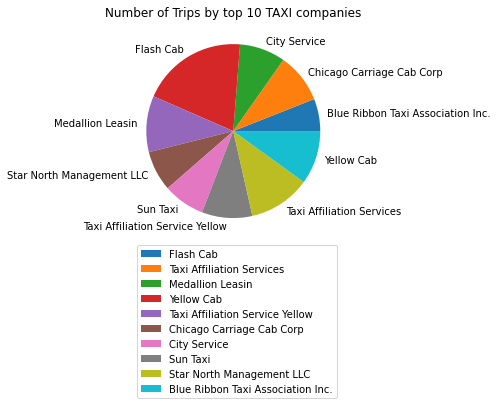

In [10]:
ax=top_10_companies.groupby(['company_name']).sum().plot(kind='pie', y='trips_amount')
#ax.get_legend_handles_labels()
#ax.legend(company_name, labels, loc='best')
ax.legend(top_10_companies['company_name'],  bbox_to_anchor=(1, 0),loc='best')
plt.ylabel("")
plt.title("Number of Trips by top 10 TAXI companies");

### Conclusion:
The number of rides performed by each taxi company on November 15-16, 2017. More than 50\% of rides during these two days were performed by 5 taxi companies.  Data in correct type.

<div class="alert alert-block alert-success">
<b>Success:</b> Great visualization!
</div>

## Neighborhoods

In [11]:
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [12]:
neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


### Conclusion:
Data type is correct

### Visualize the data

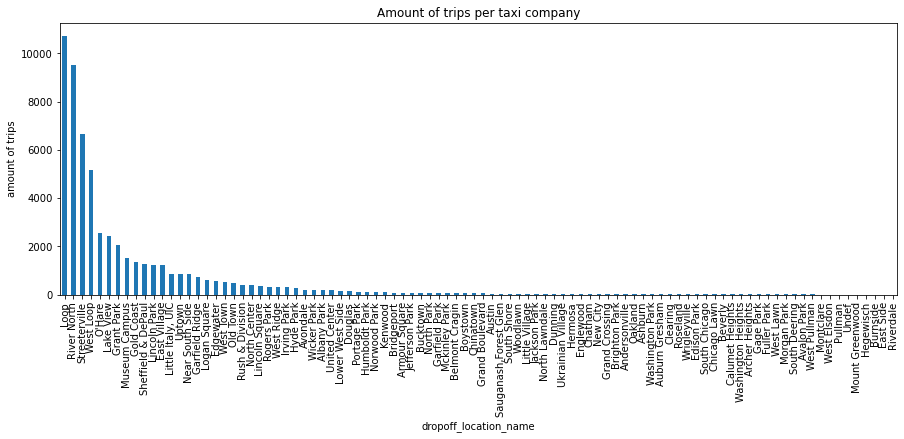

In [13]:
plt.figure(figsize=(15,5))
neighborhoods.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of trips per taxi company')
plt.ylabel('amount of trips');

## Detect important players

In [14]:
y = (neighborhoods.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending = False))/neighborhoods.average_trips.sum()*100
y.head(20)

dropoff_location_name
Loop                  19.021798
River North           16.887236
Streeterville         11.817696
West Loop              9.156143
O'Hare                 4.516128
Lake View              4.292825
Grant Park             3.667895
Museum Campus          2.677511
Gold Coast             2.419040
Sheffield & DePaul     2.233801
Lincoln Park           2.210336
East Village           2.149220
Little Italy, UIC      1.531501
Uptown                 1.506617
Near South Side        1.489181
Garfield Ridge         1.321733
Logan Square           1.099967
Edgewater              1.034300
West Town              0.915673
Old Town               0.832629
Name: average_trips, dtype: float64

### Conclusion:
Over 75\% of all trips made in the dataset were dropped off in the top 10 neighborhoods.

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading was done well!
</div>

### Top 10

In [15]:
top_10_neighborhoods = neighborhoods.nlargest(10, 'average_trips')
top_10_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [16]:
sum(top_10_neighborhoods.average_trips)/sum(neighborhoods.average_trips)

0.7669007507076714

In [17]:
top_10_neighborhoods['%'] = top_10_neighborhoods['average_trips']/(top_10_neighborhoods['average_trips']).sum()
top_10_neighborhoods = top_10_neighborhoods.sort_values(by='average_trips', ascending=False).reset_index(drop=True)
top_10_neighborhoods

,dropoff_location_name,average_trips,%
0,Loop,10727.466667,0.248035
1,River North,9523.666667,0.220201
2,Streeterville,6664.666667,0.154097
3,West Loop,5163.666667,0.119392
4,O'Hare,2546.900000,0.058888
5,Lake View,2420.966667,0.055976
6,Grant Park,2068.533333,0.047828
7,Museum Campus,1510.000000,0.034913
8,Gold Coast,1364.233333,0.031543
9,Sheffield & DePaul,1259.766667,0.029128


In [18]:
(neighborhoods.groupby('dropoff_location_name')['average_trips'].sum().sort_values(ascending = False))\
    /neighborhoods.average_trips.sum()*100

dropoff_location_name
Loop               19.021798
River North        16.887236
Streeterville      11.817696
West Loop           9.156143
O'Hare              4.516128
                     ...    
Mount Greenwood     0.005564
Hegewisch           0.005528
Burnside            0.004137
East Side           0.003478
Riverdale           0.003192
Name: average_trips, Length: 94, dtype: float64

### Visualize top 10

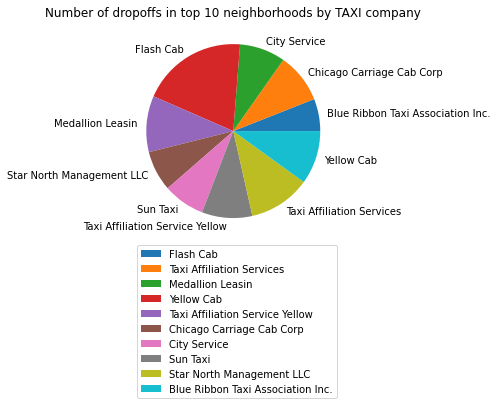

In [19]:
ax=top_10_companies.groupby(['company_name']).sum().plot(kind='pie', y='trips_amount')
#ax.get_legend_handles_labels()
#ax.legend(company_name, labels, loc='best')
ax.legend(top_10_companies['company_name'],  bbox_to_anchor=(1, 0),loc='best')
plt.ylabel("")
plt.title("Number of dropoffs in top 10 neighborhoods by TAXI company");

### Conclusion:
Around 65\% of trips in this neighborhoods were dropped off in 5 cities. This frame is for the month of November. Data in correct type.

<div class="alert alert-block alert-success">
<b>Success:</b> This part was done in the right way!
</div>

## Ohara

In [20]:
ohara.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [21]:
ohara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [22]:
ohara.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [23]:
ohara['start_ts'] = [datetime.datetime.strptime(d, "%Y-%m-%d %H:%M:%S") for d in ohara["start_ts"]]

In [24]:
ohara['date'] = [datetime.datetime.date(d) for d in ohara['start_ts']] 
ohara['date'] = pd.to_datetime(ohara['date'])

In [25]:
ohara['time'] = [datetime.datetime.time(d) for d in ohara['start_ts']] 

In [26]:
ohara['day'] = ohara['start_ts'].dt.day_name()

### Conclusion:
Data type is good now.

In [27]:
### Visualize the data

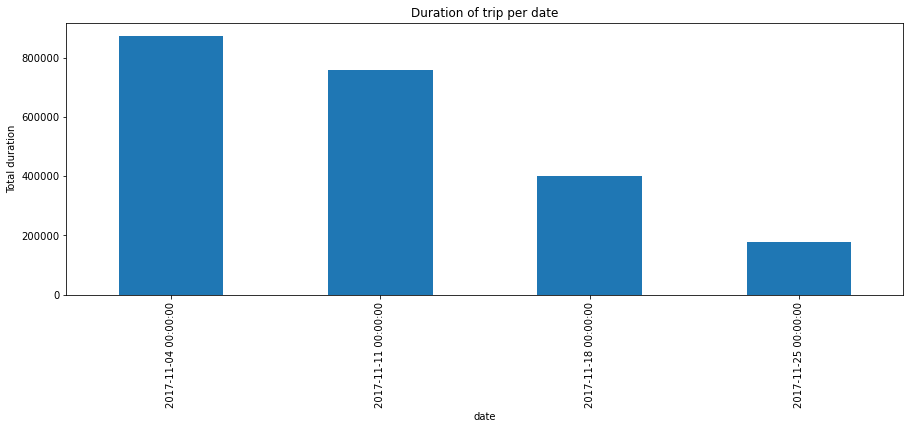

In [28]:
plt.figure(figsize=(15,5))
ohara.groupby('date')['duration_seconds'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Duration of trip per date')
plt.ylabel('Total duration');

In [29]:
(ohara.groupby('date')['duration_seconds'].sum().sort_values(ascending = False))\
    /ohara.duration_seconds.sum()*100

date
2017-11-04    39.483524
2017-11-11    34.302174
2017-11-18    18.166879
2017-11-25     8.047423
Name: duration_seconds, dtype: float64

#### Conclusion:
The time in the Ohara dataframe is different from that in trips.  Here the dates are Nov 4, 11, 18 and 25.  In trips it was Nov. 15 and 16.  So there is no overlap between the two. There is more traffic in taxi rides in the beginning of the months on Saturdays.

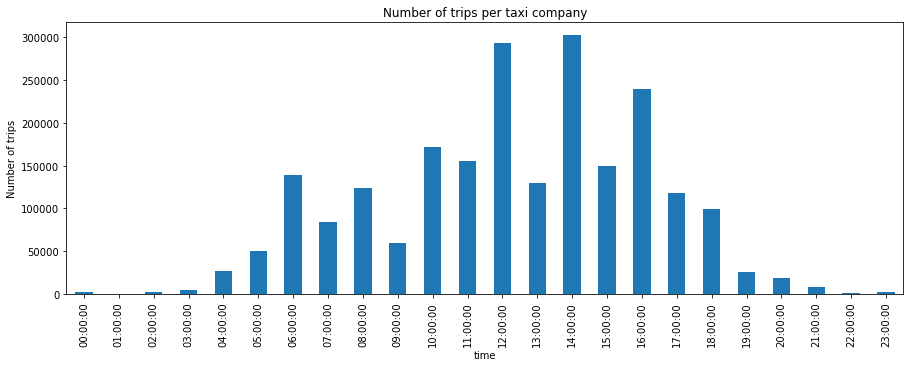

In [30]:
plt.figure(figsize=(15,5))
new_order = ['1:00:00', '2:00:00', '3:00:00', '4:00:00', '5:00:00', 
             '6:00:00', '7:00:00', '8:00:00', '9:00:00', '10:00:00',
             '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00',
             '16:00:00', '17:00:00', '18:00:00', '19:00:00', '20:00:00',
             '21:00:00', '22:00:00', '33:00:00', '24:00:00']

ohara.groupby('time')['duration_seconds'].sum().plot(kind='bar')
plt.title('Number of trips per taxi company')
plt.ylabel('Number of trips');

#### Conclusion:
Most of the trips are done around noon.

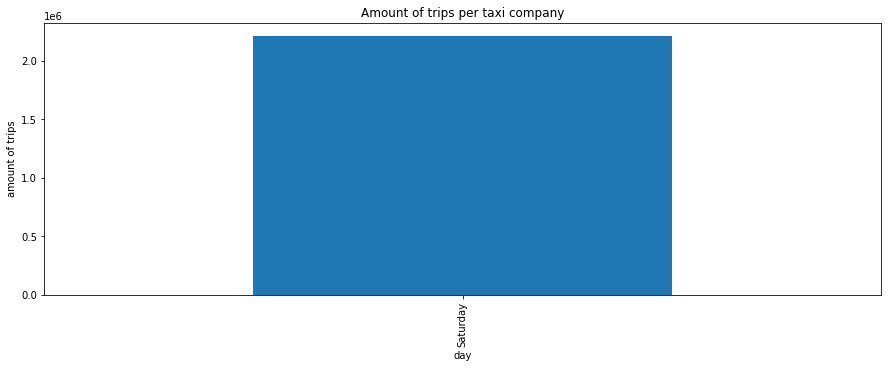

In [31]:
plt.figure(figsize=(15,5))
ohara.groupby('day')['duration_seconds'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of trips per taxi company')
plt.ylabel('amount of trips');

#### Conclusion:
All the trips are done on saturdays.

In [32]:
(ohara.groupby(['time', 'start_ts'])['duration_seconds'].sum().sort_values(ascending = False))\
    /ohara.duration_seconds.sum()*100

time      start_ts           
14:00:00  2017-11-04 14:00:00    6.746199
12:00:00  2017-11-04 12:00:00    5.595431
16:00:00  2017-11-04 16:00:00    5.239335
          2017-11-11 16:00:00    3.597292
14:00:00  2017-11-11 14:00:00    3.573383
                                   ...   
22:00:00  2017-11-04 22:00:00    0.062370
03:00:00  2017-11-25 03:00:00    0.062099
          2017-11-18 03:00:00    0.056901
00:00:00  2017-11-18 00:00:00    0.021694
01:00:00  2017-11-04 01:00:00    0.000000
Name: duration_seconds, Length: 81, dtype: float64

#### Conclusion:
Trips done in the early afternoon in the beginning of the month on Saturdays are the longest.

### Top 500 trip duration

In [33]:
top_500_ohara = ohara.nlargest(500, 'duration_seconds')

In [34]:
sum(top_500_ohara.duration_seconds)/sum(ohara.duration_seconds)*100

62.04028818467249

### Conclusion:
The top 500 longest trip durations account for over 60\% of all durations in the Ohara dataframe on Saturdays of the month of November.

In [35]:
top_500_ohara['%'] = top_500_ohara['duration_seconds']/(top_500_ohara['duration_seconds']).sum()
top_500_ohara = top_500_ohara.sort_values(by='duration_seconds', ascending=False).reset_index(drop=True)
top_500_ohara

,start_ts,weather_conditions,duration_seconds,date,time,day,%
0,2017-11-25 11:00:00,Good,7440.0,2017-11-25,11:00:00,Saturday,0.005420
1,2017-11-25 14:00:00,Good,6420.0,2017-11-25,14:00:00,Saturday,0.004677
2,2017-11-18 12:00:00,Bad,4980.0,2017-11-18,12:00:00,Saturday,0.003628
3,2017-11-11 16:00:00,Good,4980.0,2017-11-11,16:00:00,Saturday,0.003628
4,2017-11-11 15:00:00,Good,4800.0,2017-11-11,15:00:00,Saturday,0.003497
...,...,...,...,...,...,...,...
495,2017-11-25 16:00:00,Good,2091.0,2017-11-25,16:00:00,Saturday,0.001523
496,2017-11-11 17:00:00,Good,2089.0,2017-11-11,17:00:00,Saturday,0.001522
497,2017-11-18 10:00:00,Bad,2083.0,2017-11-18,10:00:00,Saturday,0.001517
498,2017-11-18 05:00:00,Good,2075.0,2017-11-18,05:00:00,Saturday,0.001512


### Visualize the top 500 and weather condition

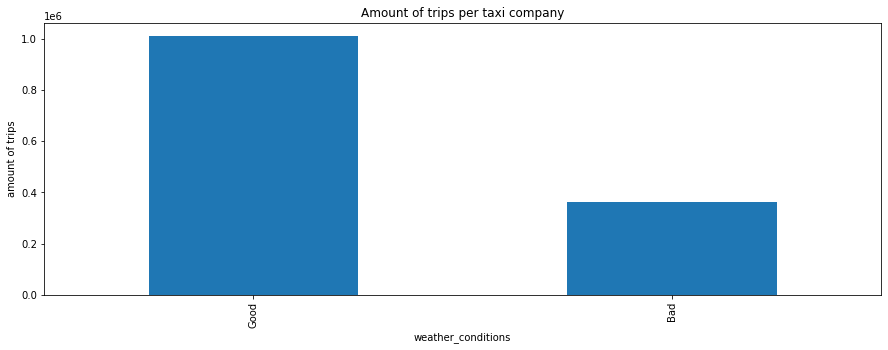

In [37]:
plt.figure(figsize=(15,5))
top_500_ohara.groupby('weather_conditions')['duration_seconds'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Amount of trips per taxi company')
plt.ylabel('amount of trips');

In [38]:
top_500_ohara.weather_conditions.value_counts()/len(top_500_ohara)

Good    0.74
Bad     0.26
Name: weather_conditions, dtype: float64

In [39]:
ohara.weather_conditions.value_counts()/len(ohara)

Good    0.831461
Bad     0.168539
Name: weather_conditions, dtype: float64

In [40]:
top_500_ohara.date.value_counts()/len(top_500_ohara)

2017-11-04    0.486
2017-11-11    0.264
2017-11-18    0.192
2017-11-25    0.058
Name: date, dtype: float64

In [41]:
top_500_ohara.time.value_counts()/len(top_500_ohara)

14:00:00    0.188
16:00:00    0.170
12:00:00    0.164
15:00:00    0.098
17:00:00    0.092
13:00:00    0.082
11:00:00    0.072
18:00:00    0.068
10:00:00    0.040
06:00:00    0.008
19:00:00    0.006
20:00:00    0.006
02:00:00    0.002
07:00:00    0.002
05:00:00    0.002
Name: time, dtype: float64

### Conclusion:
The top 500 longest trips are conducted in good weather conditions 75\% of the times.  The longest Saturday trips also occur in the beginning of the month and then precipitously drop over the month of November. Most long trips occur early afternoon.

<div class="alert alert-block alert-success">
<b>Success:</b> Great that you've made initial analysis, checked data and visualized some distributions!
</div>

# Test the hypothesis:
"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

## Setup:

We are trying to understand the relationship between 2 variables in the Ohara dataset: duration and weather.  I will tackle this in two ways.  First, I compare the means of the good day weather conditions bad weather conditions to see if they are equal.  We know they are not equal because 75\% of the longest 500 trip coincided on a good day while over 80\% of all trips coincided on a good weather.  The second way, I try to answer the same question is using an explanatory logistic regression analysis - this is different from the pretictive modeling using logistic regression.

H0: The means of both populations are equal, that is good vs bad days means duration are equal. 

H1: The means of both populations are not equal, that is good vs bad days means duration are not equal. 

## Encoding
We know weather_conditions_en cannot be normally distribution since it is a binary variable.  Still, I conduct a normality test. 

In [42]:
def cond(val):
    if val == "Bad":
        return 0
    return 1
ohara['weather_conditions_en'] = ohara['weather_conditions'].apply(cond)

In [43]:
pg.normality(ohara.weather_conditions_en, method='normaltest')

,W,pval,normal
weather_conditions_en,305.60987,4.341700e-67,False


In [44]:
p_value_levene=st.levene(ohara['weather_conditions'] == "Good", ohara['weather_conditions'] == "Bad").pvalue.astype(int)
if p_value_levene<0.05:
    print('Reject H0: variance of sample 1 is not equal to variance of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 and sample 2 are not the same") 

Fail to Reject H0: We don't have enough evidence to say that variances of sample 1 and sample 2 are not the same


### Conclusion:
This means that it is fair to consider that both samples have equal variance.  Thus, I can set the equal variance parameter of the  ttest to True.  I choose an alpha of 5% because it is the acceptable level of error for such analysis.

<div class="alert alert-block alert-success">
<b>Success:</b> It was a good idea to make test on variances equality at first.
</div>

In [45]:
results = st.ttest_ind(ohara['weather_conditions'] == "Good", ohara['weather_conditions'] == "Bad",
                        equal_var=True)
print('p-value: ', results.pvalue)

if (results.pvalue < 0.05):
        print("We reject the null hypothesis")
else:
        print("We retain the null hypothesis")

p-value:  1.4959805706438041e-270
We reject the null hypothesis


Alternatively,

In [46]:
t, pval = ttest_ind(ohara['weather_conditions'] == "Good", ohara['weather_conditions'] == "Bad")

print("p-values" + str(pval))
if pval < 0.05:    # alpha value is 0.05 or 5%
    print("We are rejecting the null hypothesis")
else:
    print("We are not rejecting the null hypothesis")

p-values1.4959805706438041e-270
We are rejecting the null hypothesis


### Conclusion:
The sample of rides done on a good weather day is different from that of rides done on a bad weather day.

<div class="alert alert-block alert-success">
<b>Success:</b> Both null and alternative hypotheses were formulated correctly. Testing was done in the right way too.
</div>

## Further exploratory logistic analysis

/var/folders/gk/hvqbhchj1fqfp9s9tq_k1rfr0000gp/T/ipykernel_89264/1033325736.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


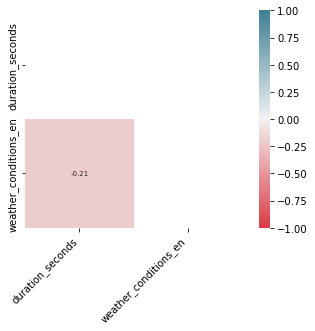

In [47]:
corr = ohara.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220,  as_cmap=True),
    square=True,
    mask=mask,
    annot=True,
    annot_kws={"size": 7}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Conclusion:
There is a weak negative relationship between the two variables.

In [48]:
GLM_model = sm.GLM.from_formula("weather_conditions_en ~ duration_seconds", family=sm.families.Binomial(), data=ohara)
results = GLM_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     weather_conditions_en   No. Observations:                 1068
Model:                               GLM   Df Residuals:                     1066
Model Family:                   Binomial   Df Model:                            1
Link Function:                     Logit   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -462.64
Date:                   Fri, 08 Apr 2022   Deviance:                       925.29
Time:                           22:11:56   Pearson chi2:                 1.05e+03
No. Iterations:                        5   Pseudo R-squ. (CS):            0.03993
Covariance Type:               nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.0908      0.259     11.945      0.000       2.584       3.598
duration_seconds    -0.0007      0.000     -6.414      0.000      -0.001      -0.000
====================================================================================
"""

### Conclusion:
The model is not great.  The R2 is only 4\%.  This means the model explains only 4% of the variability.  The coefficient of duration_seconds is negative and statistically significant.  This means that the relationship, as stated in the correlation matrix above is negative. 

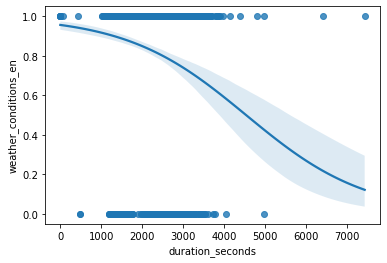

In [49]:
sns.regplot(y = "weather_conditions_en",
            x = "duration_seconds", 
            data=ohara, logistic=True, ci=95);

### General Conclusion:
The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays. Moreover, there seems to be a negative and statistically significant relationship between duration and weather since the p-value of the coefficient is less than 0.05.  That does not mean that duration predicts the type of weather we have around Ohara.  Instead it means when we have longer duration trips, they tend to be during specific weather conditions.  Remember that we encoded bad weather and 0 and good weather as 1.  This means as the weather deteriorates from 1 to 0, the duration increases.   This makes sense because as the weather conditions becomes less favorable, traffic and accidents increase. Also noteworthy is the confidence level.  As we move to bad weather, our prediction becomes less accurate.

<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see final conclusion!
</div>


<div class="alert alert-block alert-info">
<b>Improve: </b> It would be better if you've used bullet points and bold font here.
</div>